In [1]:
import pandas as pd
import os
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

# Set the style of the visualization
sns.set_style("whitegrid")
sns.set(rc={'figure.figsize': (14, 8)})
sns.set_palette("Set2")


# Exploratory Data Analysis of Spotify Tracks dataset

#### Table of contents
- Loading the dataset
- Data wrangling for missing variables 
- Data analysis
- Modling prediction and final remarks

### Loading the dataset
The dataset contains 114000 tracks from Spotify, with 20 variables. The variables are:


- **numerical** features: 
    - track_id, The identifier key for the track generated by Spotify
    - popularity: The popularity of the song, ranges between [0, 100]
    - duration_ms: The length of the track in milliseconds (ms)
    - danceability: The measure of the track being danceable, ranges between [0, 1]
    - energy: The energy of the track, ranges between [0, 1]
    - loudness: The loudness of the track in decibel (dB)
    - speechiness: The relative length of the track containing any human voice, ranges between [0, 1] 
    - acousticness: The relative metric of the track being acoustic, ranges between [0, 1]
    - instrumentalness: The relative ratio of the track being instrumental, ranges between [0, 1]
    - liveness: The relative duration of the track sounding as a live performance, ranges between [0, 1]
    - valence: The positiveness of the track, ranges between [0, 1]
    - tempo: The tempo of the track in Beat Per Minute (BPM), ranges between [50, 150]
    
- **categorical** features:
    - artists: The name of singers or groups who sing the track
    - album_name: The title of the album where the track is from, 0 = No album name
    - track_name: The title of the song
    - explicit: The boolean value whether the track contains explicit content or not, (0 = No explicit content, 1 = Explicit content)
    - key: The primary key of the track encoded as integers in between 0 and 11 (starting on C as 0, C# as 1 and so on…)
    - mode: The binary value representing whether the track starts with a major = 1 or a minor = 0 chord progression
    - time_signature: The estimated overall time signature of the track, (Ranges from 0 to 5)
    - track_genre: The genre of the song


In [2]:
df = pd.read_csv('spotify_tracking_dataset.csv', index_col=0)
print(df.columns)

Index(['track_id', 'artists', 'album_name', 'track_name', 'popularity',
       'duration_ms', 'explicit', 'danceability', 'energy', 'key', 'loudness',
       'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'time_signature', 'track_genre'],
      dtype='object')


In order to understand the dataset, we will print the summary information of the dataset, and the first 5 rows of the dataset.

In [3]:
df.info()

# We could use df.dtypes to get the data types of each column instead
# df.dtypes

<class 'pandas.core.frame.DataFrame'>
Int64Index: 114000 entries, 0 to 113999
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   track_id          114000 non-null  object 
 1   artists           113999 non-null  object 
 2   album_name        113999 non-null  object 
 3   track_name        113999 non-null  object 
 4   popularity        114000 non-null  int64  
 5   duration_ms       114000 non-null  int64  
 6   explicit          114000 non-null  bool   
 7   danceability      114000 non-null  float64
 8   energy            114000 non-null  float64
 9   key               114000 non-null  int64  
 10  loudness          114000 non-null  float64
 11  mode              114000 non-null  int64  
 12  speechiness       114000 non-null  float64
 13  acousticness      114000 non-null  float64
 14  instrumentalness  114000 non-null  float64
 15  liveness          114000 non-null  float64
 16  valence           11

In [4]:
df.head(5)

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


To get a statistical summary of the dataset, we will use the `describe` method.

In [5]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
track_id,114000,89741,6S3JlDAGk3uu3NtZbPnuhS,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN
artists,113999,31437,The Beatles,279,NaN,NaN,NaN,NaN,NaN,NaN,NaN
album_name,113999,46589,Alternative Christmas 2022,195,NaN,NaN,NaN,NaN,NaN,NaN,NaN
track_name,113999,73608,Run Rudolph Run,151,NaN,NaN,NaN,NaN,NaN,NaN,NaN
popularity,114000.0,NaN,NaN,NaN,33.238535,22.305078,0.0,17.0,35.0,50.0,100.0
duration_ms,114000.0,NaN,NaN,NaN,228029.153114,107297.712645,0.0,174066.0,212906.0,261506.0,5237295.0
explicit,114000,2,False,104253,NaN,NaN,NaN,NaN,NaN,NaN,NaN
danceability,114000.0,NaN,NaN,NaN,0.5668,0.173542,0.0,0.456,0.58,0.695,0.985
energy,114000.0,NaN,NaN,NaN,0.641383,0.251529,0.0,0.472,0.685,0.854,1.0
key,114000.0,NaN,NaN,NaN,5.30914,3.559987,0.0,2.0,5.0,8.0,11.0


### Data wrangling for missing variables
We will run a preliminary check for missing values in the dataset. If there are missing values, we will remove them from the dataset. We will also check for duplicate rows and remove them if they exist.

First, we will drop the `track_id` column, as it is not useful for our analysis. We will also change the type of `artists`, `album_name`, and `track_genre` to `categorical` variables, and the type of `explicit` to binary integers.

In [6]:
df.drop('track_id', axis=1, inplace=True)

In [7]:
for col in ['artists', 'album_name', 'track_genre']:
    df[col] = df[col].astype('category')

df['explicit'] = df['explicit'].astype(int)


Now, we will check for missing values and duplicate rows.

In [8]:
# Check for missing values
df.isnull().sum()

artists             1
album_name          1
track_name          1
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64

In [9]:
# Remove rows with missing values
df.dropna(inplace=True)

In [10]:
# Finding duplicate rows based on artist track name, and genre
duplicates = df[df.duplicated(subset=['track_name', 'artists', 'track_genre'], keep=False)]

# Remove duplicate rows 
df.drop_duplicates(subset=['track_name', 'artists', 'track_genre'], inplace=True)


print("Duplicate Tracks:")
print(duplicates)
print(f"\nData has {df.duplicated().sum()} duplicate tracks after cleaning")

Duplicate Tracks:
                                     artists  \
3                               Kina Grannis   
4                           Chord Overstreet   
5                               Tyrone Wells   
6       A Great Big World;Christina Aguilera   
7                                 Jason Mraz   
...                                      ...   
113881                 Bryan & Katie Torwalt   
113882                 Bryan & Katie Torwalt   
113917       Hillsong Worship;Mi-kaisha Rose   
113951             Passion;Kristian Stanfill   
113991                          Chris Tomlin   

                                               album_name  \
3       Crazy Rich Asians (Original Motion Picture Sou...   
4                                                 Hold On   
5                                    Days I Will Remember   
6                             Is There Anybody Out There?   
7                     We Sing. We Dance. We Steal Things.   
...                                    

### Analysis of the dataset

Let's start by counting the number of unique categories for the categorical variables. We will also plot the distribution of the numerical variables, and check the pairwise relation between `popularity` index and the other numerical variables.

In [11]:
print(f"Number of unique artists: {df['artists'].nunique()}")
print(f"Number of unique albums: {df['album_name'].nunique()}")
print(f"Number of unique genres: {df['track_genre'].nunique()}")

Number of unique artists: 31437
Number of unique albums: 45128
Number of unique genres: 114


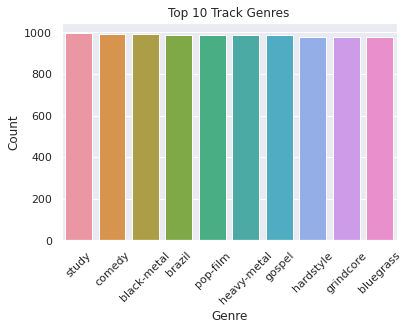

In [12]:
genre_counts = df['track_genre'].value_counts().to_frame()
genre_counts.reset_index(inplace=True)
genre_counts.columns = ['track_genre', 'count']

# Display the top 10 genres
genre_counts = genre_counts.head(10)

sns.countplot(x='track_genre', data=df, order=genre_counts['track_genre'])

plt.xticks(rotation=45)  
plt.title('Top 10 Track Genres')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.show()

Now, we will plot the distribution of the numerical variables and the pairwise relation between `popularity` index and the other numerical variables.

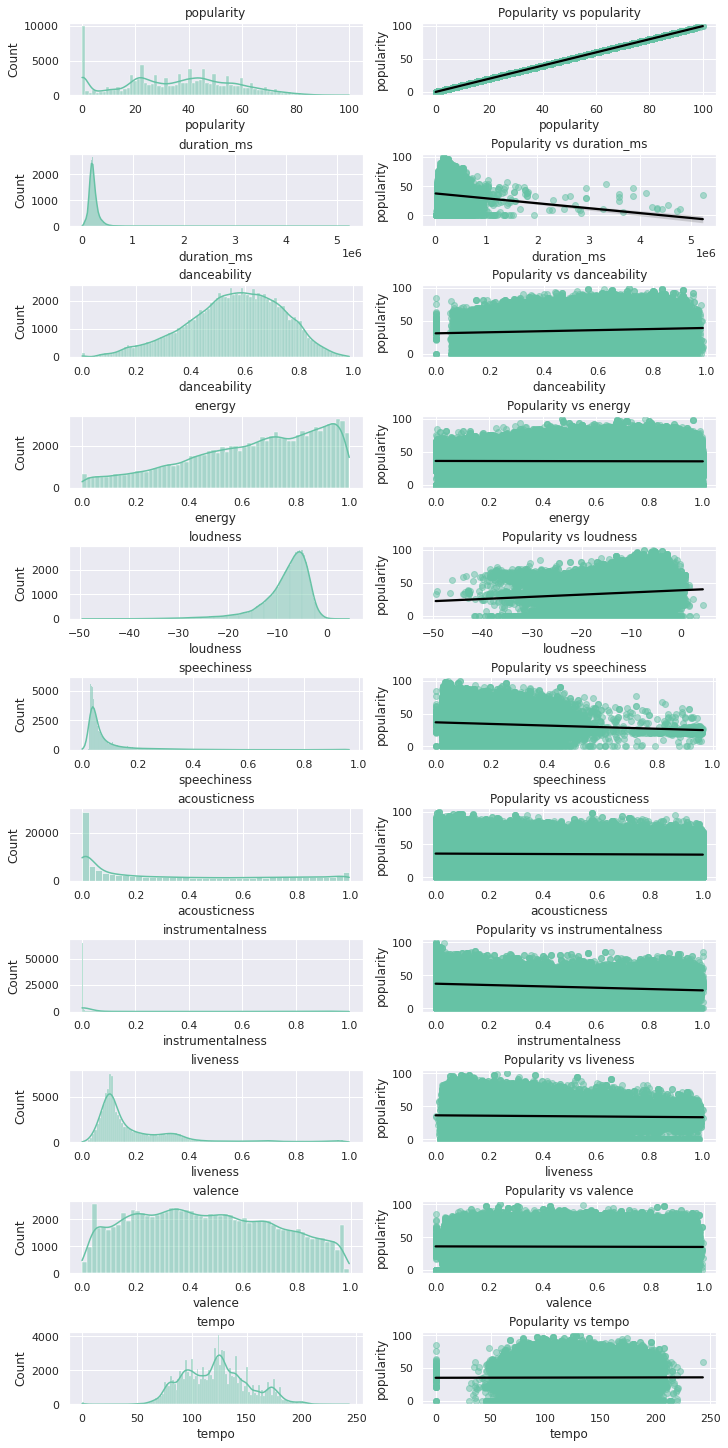

In [13]:
num_vars = ['popularity', 'duration_ms', 'danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']
fig, axs = plt.subplots(len(num_vars), 2, figsize=(10, 20), constrained_layout=True)

for i, col in enumerate(np.repeat(num_vars, 2)):
    ax = axs.flat[i]
    if i % 2 == 0:
        sns.histplot(df[col], ax=ax, kde=True)  
        ax.set_title(col)
        ax.set_ylabel('Count')
    else:
        sns.regplot(x=df[col], y=df['popularity'], scatter_kws={'alpha':0.5}, line_kws={"color": "black"}, ax=ax)
        ax.set_title('Popularity vs ' + col)

plt.show()

Based on the scattering of the numerical variables, we can see there are some relationships between the `popularity` index and the other numerical variables. For example, the `popularity` index seems to be higher for tracks with higher `danceability`, and `loudness`. However, those relationships are not linear, and there are non-linearities between the dependent variable `popularity` and the independent variables that needs to be further investigated.

In order to discover the relationship between popularity of a song and the categorical variables, we divide the range of popularity into 4 categories and plot the contingency table of the categorical variables with the popularity index.

Additionally, We can check the balance of categorical variables. This will help us to identify imbalanced categories, which can be a problem for the predictive model.

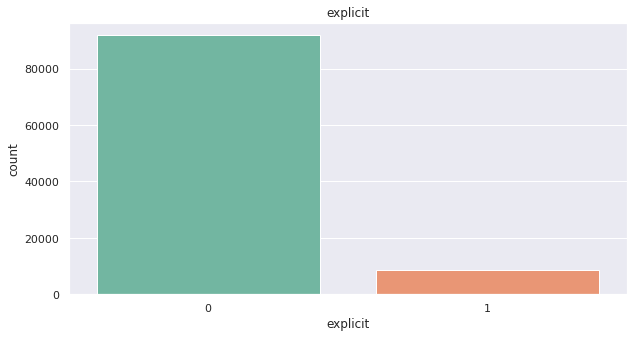

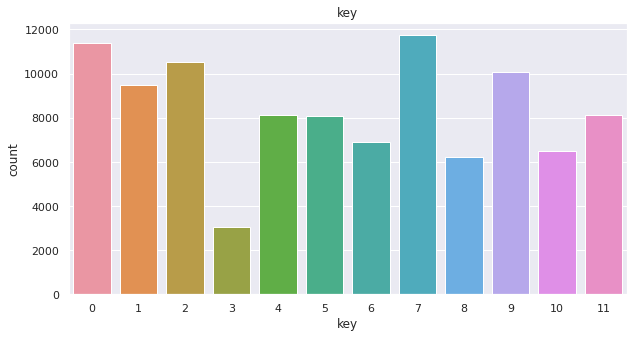

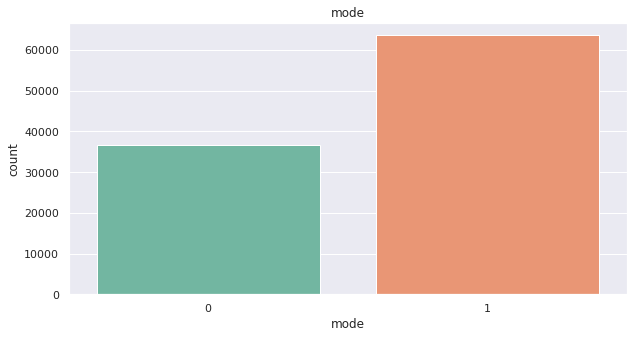

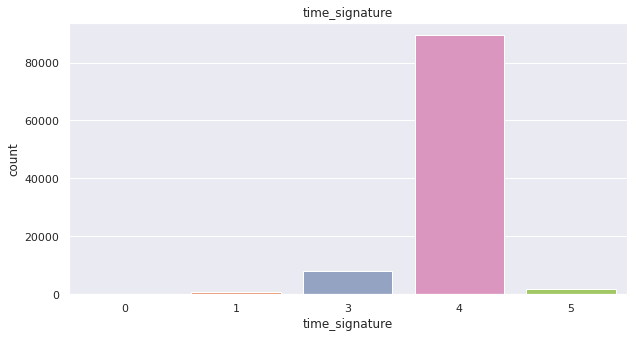

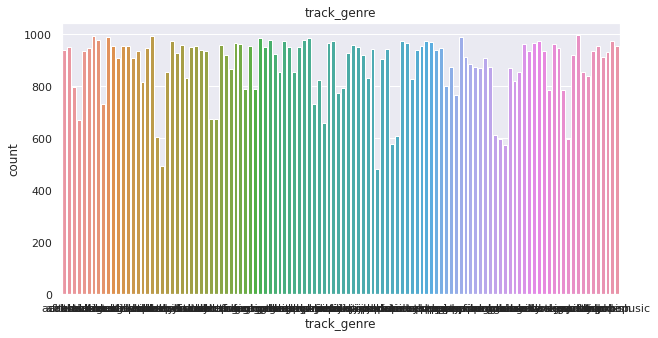

In [20]:
col_names = ['explicit', 'key', 'mode', 'time_signature', 'track_genre']
for col in col_names:
    fig, ax = plt.subplots(figsize=(10, 5))
    sns.countplot(x=col, data=df, ax=ax)
    plt.title(col)
    plt.show()

In [21]:
df['popularity_cat']=pd.cut(df['popularity'], bins=4,labels=['minimal','modest','considerable','high'])

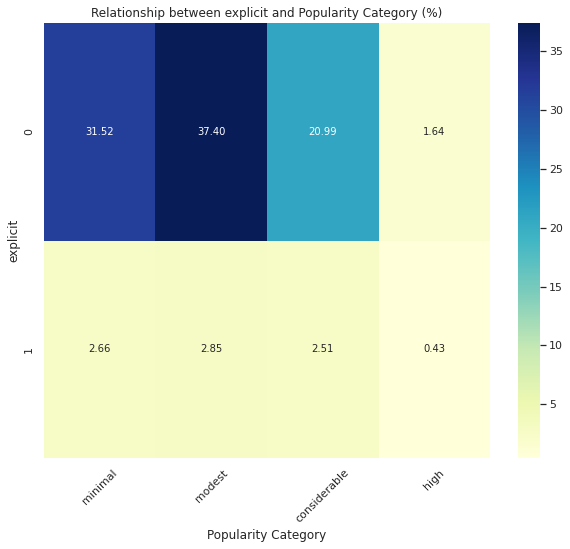

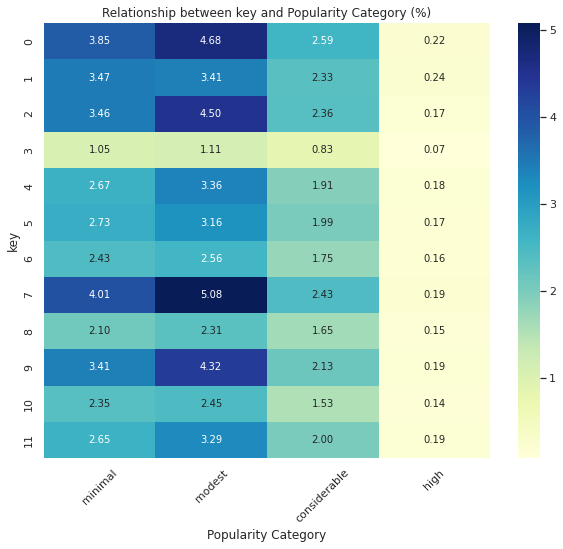

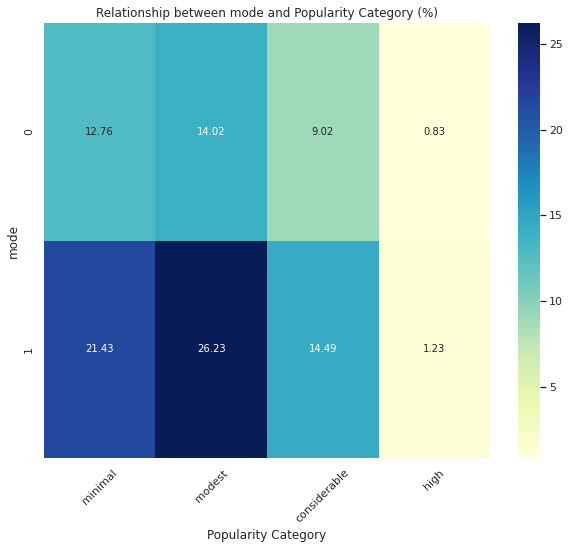

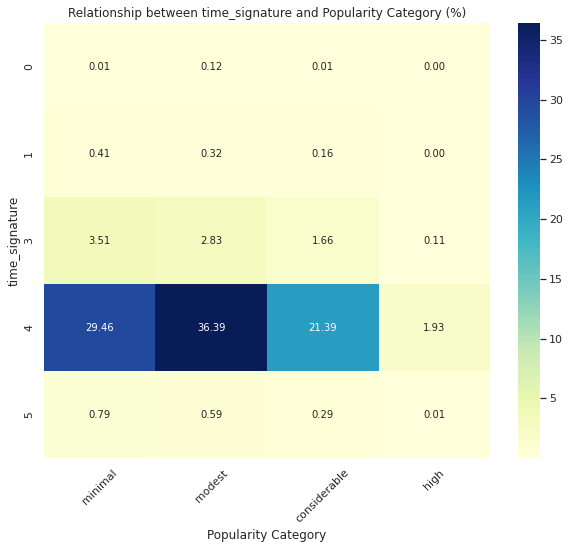

In [22]:
categorical_vars = ['explicit', 'key', 'mode', 'time_signature']

# Loop through the categorical variables to create crosstabs and plots
for var in categorical_vars:
    crosstab_norm = pd.crosstab(df[var], df['popularity_cat'], normalize='all') * 100  
    
    plt.figure(figsize=(10, 8))
    sns.heatmap(crosstab_norm, annot=True, cmap="YlGnBu", fmt=".2f")
    plt.title(f'Relationship between {var} and Popularity Category (%)')
    plt.xlabel('Popularity Category')
    plt.ylabel(var)
    plt.xticks(rotation=45)
    plt.show()

In [23]:
top_geners = df.groupby("track_genre")["popularity"].mean().nlargest(5)
top_geners_df = pd.DataFrame({'track_genre': top_geners.index, 'mean_popularity': top_geners.values}).set_index('track_genre')

print(top_geners_df)

             mean_popularity
track_genre                 
pop                59.853977
pop-film           59.350859
k-pop              58.437707
chill              55.068303
sad                52.926349


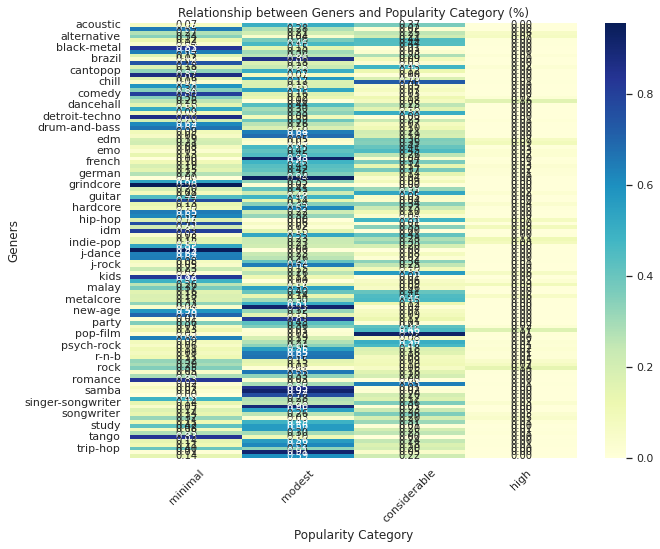

In [24]:
crosstab_norm = pd.crosstab(df['track_genre'], df['popularity_cat'], normalize='all') * 100  
    
plt.figure(figsize=(10, 8))
sns.heatmap(crosstab_norm, annot=True, cmap="YlGnBu", fmt=".2f")
plt.title(f'Relationship between Geners and Popularity Category (%)')
plt.xlabel('Popularity Category')
plt.ylabel('Geners')
plt.xticks(rotation=45)
plt.show()

This result shows that:
 - The song track with unexplicit content are less likely to be popular.
 - There is no direct relationship between a song being highly popular with the primary key of the song. However, song track with primary key 7 (#F) are less likely to be popular.
 - The song tracks starting with a major chord progression are more likely to be popular.
 - Most tracks in the `Spotipy` dataset are in 4-5 minutes long, and the abundancy of tracks in this category seems to affect the success rate of the song.
 - The genre of the song does not seem to affect the popularity of the song significantly. However, `pop` songs seem to be more popular and there are some exceptions, such as `party` songs and `romance` songs, that are biased towards being more popular.

Now we will normalize the data and plot the correlation matrix of the numerical variables. This will help us to understand the relationship between the numerical variables. Additionally, to include the non-linear relationship between variables, we use `spearman` correlation.

In [29]:
num_vars = ['popularity', 'duration_ms', 'danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']
scaler = StandardScaler()
df_normalized = scaler.fit_transform(df[num_vars])  
df[num_vars] = df_normalized 

<Axes: >

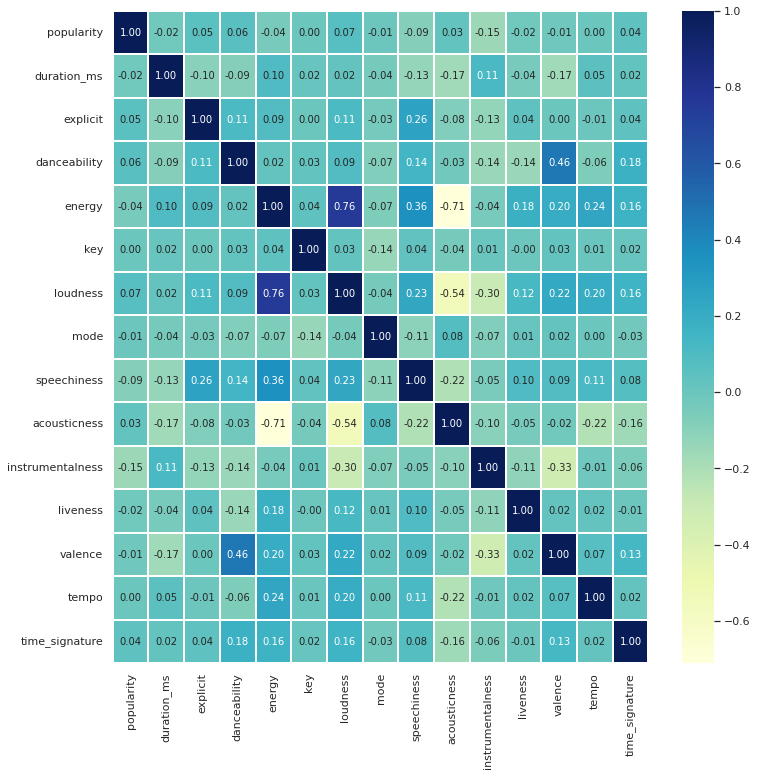

In [30]:
fig, ax = plt.subplots(figsize=(12, 12))
sns.heatmap(df.corr(method='spearman'), annot=True, fmt='.2f', linewidths=2, ax=ax, cmap="YlGnBu")

**Popularity Correlations:**
There is no strong correlation between popularity and any of the numerical variables, suggestion that for a song to be popular, it needs to have a good balance of combined features, rather than just one or two features.

**Energy and Loudness:**
Energy and loudness have a very high positive correlation (0.76), indicating that there is strong coliinearity between these two variables. This makes sense as louder tracks are typically more energetic. We can drop one of these variables in the future analysis (i.e., `energy`).

**Danceability and Valence:**
Danceability has a strong positive correlation with valence (0.476), suggesting that tracks that are more danceable are often perceived as more positive or happy.

**Acousticness:**
Acousticness has a strong negative correlation with energy (-0.71) and loudness (-0.54), indicating that more acoustic tracks tend to be quieter and less energetic.

**Instrumentalness:**
Instrumentalness has a significant negative correlation with valence (-0.33), which could suggest that tracks with higher instrumental content are less likely to be perceived as happy or positive.(no mood for words when you are down!)

In [31]:
# Dropping the energy column for redundancy
df.drop(['energy'], axis=1, inplace=True)

## Predictive Modeling and Final Remarks

So far we explored different aspects of the Spotify dataset, and we have a good understanding of the relationship between the variables. Our preliminary analysis suggests that there are strong non-linear relationships between the dependent variable `popularity` and the independent variables. Using the information we have gathered, we can build a model to predict the category of popularity of song tracks. This will help us to understand the combination set of independent factors that contribute to the popularity of a song. In the following steps, we will:

1. **Preprocess the Data**: In this section for simplicity, we will only consider the numerical variables. We can also encode categorical variables to using one-hot encoding.
2. **Split the Data**: Then, we divide the dataset into independant features (X) and the target variable (y) (i.e., `popularity categories`). We split both into training and test sets to evaluate the model's performance on unseen data.
3. **Apply Preprocessing**: Based on what we showed in the `Exploratory Data Analysis` section, the data in unbalanced and not normalized. Therefore, we `Standardize` our features to ensure they contribute equally to the model's performance. To do so, we use a `ColumnTransformer` to apply different preprocessing steps to numerical and categorical columns simultaneously. This includes scaling numerical variables and applying one-hot encoding to categorical variables.
4. **Dimensionality Reduction (Optional)**: To reduce the dimensionality of the data, and to attempt to capture the most important variance within the data. We can choose relatively simple techniques such as `PCA` or `TruncatedSVD` for sparse data in our scenario.
5. **Model Training and Evaluation**:
   - **Training**: Then, we fit various machine learning models to the training data and test which model performs best for our specific problem.
   - **Evaluation**: All modeling predictions are then tested on the test set to evaluate each model's accuracy. We use this information to select the best-performing model.
6. **Final Model Selection**: After comparing the performance of various models, we select the one that best predicts the the popularity category of a song. 

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Selecting the numerical and categorical columns as input features
numerical_cols = ['duration_ms', 'danceability', 'loudness', 
                  'speechiness', 'acousticness', 'instrumentalness', 'liveness', 
                  'valence', 'tempo']

categorical_cols = ['artists', 'album_name', 'explicit', 'key', 
                    'mode', 'time_signature', 'track_genre']

# Target variable
target = 'popularity_cat'

# Data preprocessing
# Separate features and target variable
# X = df.drop(target, axis=1)
X = df[numerical_cols]
y = df[target]

# Preprocessing for numerical data
numerical_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

# Preprocessing for categorical data
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        # ('cat', categorical_transformer, categorical_cols)
    ])

# Apply dimensionality reduction
pca = PCA(n_components=0.95)
# svd = TruncatedSVD(n_components=5, random_state=42)

# Define the classifier
classifier = RandomForestClassifier(random_state=42)

# Building the modeling pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('pca', pca),
                           ('classifier', classifier)])


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training the model and performing predictions
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

considerable       0.71      0.52      0.60      4737
        high       0.92      0.68      0.78       383
     minimal       0.67      0.63      0.65      6908
      modest       0.61      0.74      0.67      8014

    accuracy                           0.65     20042
   macro avg       0.73      0.64      0.67     20042
weighted avg       0.66      0.65      0.65     20042



**Comparing Models:**

In [34]:
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC, SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

# List of candidate models
models = [LogisticRegression(max_iter=1000),
          LinearSVC(),
          SVC(kernel='rbf'),
          KNeighborsClassifier(),
          RandomForestClassifier(),
          DecisionTreeClassifier(),
          GradientBoostingClassifier(),
          GaussianNB()]

model_names = ['LogisticRegression',
               'LinearSVM',
               'rbfSVM',
               'KNearestNeighbors',
               'RandomForestClassifier',
               'DecisionTree',
               'GradientBoostingClassifier',
               'GaussianNB']

acc = []

for model in models:
    pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('classifier', model)])
    
    pipeline.fit(X_train, y_train)
    
    y_pred = pipeline.predict(X_test)
    
    # Calculating the accuracy scores
    acc.append(accuracy_score(y_test, y_pred))

eval_acc = pd.DataFrame({'Modelling Algorithm': model_names, 'Accuracy': acc})
print(eval_acc)

/home/amin/dante/lib/python3.8/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


          Modelling Algorithm  Accuracy
0          LogisticRegression  0.439377
1                   LinearSVM  0.437681
2                      rbfSVM  0.491717
3           KNearestNeighbors  0.505339
4      RandomForestClassifier  0.662159
5                DecisionTree  0.586568
6  GradientBoostingClassifier  0.493414
7                  GaussianNB  0.376210


In [35]:
acc_table=pd.DataFrame(eval_acc)
acc_table = acc_table.sort_values(by='Accuracy', ascending=[False])
acc_table

,Modelling Algorithm,Accuracy
4,RandomForestClassifier,0.662159
5,DecisionTree,0.586568
3,KNearestNeighbors,0.505339
6,GradientBoostingClassifier,0.493414
2,rbfSVM,0.491717
0,LogisticRegression,0.439377
1,LinearSVM,0.437681
7,GaussianNB,0.376210


<Axes: xlabel='Accuracy', ylabel='Modelling Algorithm'>

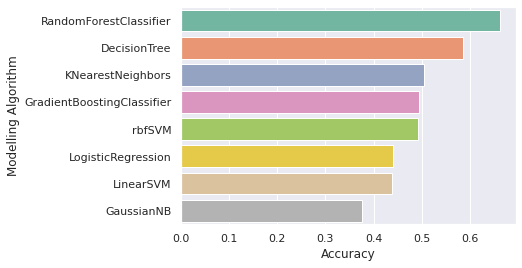

In [36]:
sns.barplot(y='Modelling Algorithm',x='Accuracy',data=acc_table)


### Final Remarks and Conclusion

**Best Model: RandomForestClassifier**
- The RandomForestClassifier model outperforms the other models, with an overall accuracy of 0.66. The model shows the best performance for the `high` and the worse performance for the `considerable` popularity class. The worse performance in our model library is the `GaussianNB` model, with an overall accuracy of 0.38. This could be due to the fact that the model assumes that the features are independent form each other and have normal distribution, which is not the case in our dataset.

**Performance Metrics Summary**
- The precision, recall, and f1-score for various classes (e.g., `considerable`, `high`, `minimal`, `modest`) indicate the model's performance across different levels of song popularity. The `weighted avg` shows the overall performance considering the support (number of instances) for each class. RandomForestClassifier's overall accuracy stands at 0.66, with varying performance across different classes. The model shows the best performance for the `high` popularity class, with an f1-score of 0.78, and the worst performance for the `considerable` popularity class, with an f1-score of 0.60.

**Further Improvements**
- The model's performance can be further improved by including more features, such as the categorical variables, and by using more advanced techniques such as `GridSearchCV` to tune the hyperparameters of the model. Additionally, we can use more advanced techniques such as `XGBoost` and `LightGBM` to improve the model's performance.

## Author

<a href="https://github.com/sdb-tbs" target="_blank">Soudabeh Tabarsaii</a>

## Version History

|  Date (YYYY-MM-DD) |  Version | Modified By  |  Change Description |
|---|---|---|---|
| 2024-03-08  | 1.0.0  | sdb-tbs  |  Created the notebook and moved to Github  |